In [1]:
from IPython.display import display, Math, Latex

# Libraries you might need
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import scipy.stats as stat

### Homework 3

**1.** Let $X \sim Poisson(\lambda)$.

**(a)**
Plot in Python the probability mass function (p.m.f.) of X for λ = 1; 5; 10; 50. What do you observe
about the shape of the p.m.f. as λ grows?
*(1 point)*

**(b)**
What are the parameters of the best matching Normal distribution for
a given Poisson distribution with parameter λ? No formal derivation is required here, use your intuition and verify by plotting (for the same values of
λ as above).
(1 point)

**(a) Answer:**
TODO

**(b) Answer:**
TODO

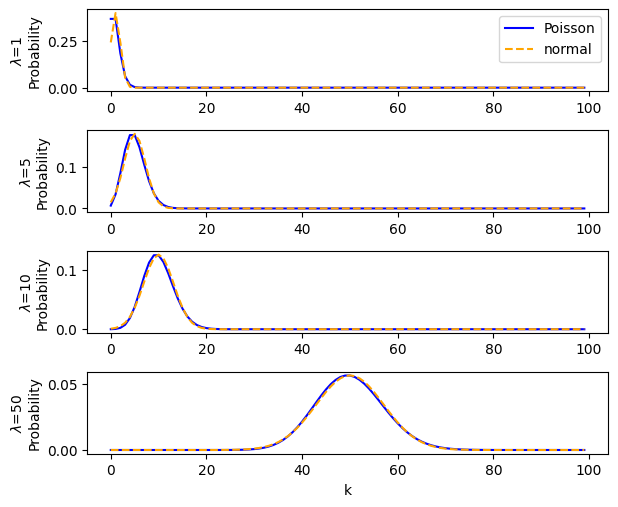

In [2]:
k=np.arange(0,100,1)
rate1= 1
rate2=5 
rate3=10 
rate4=50
loc=0
# Poisson Distrubtions
pmf1= stat.poisson.pmf(k, rate1, loc)
pmf2= stat.poisson.pmf(k, rate2, loc)
pmf3= stat.poisson.pmf(k, rate3, loc)
pmf4= stat.poisson.pmf(k, rate4, loc)

# normal distributions
normal1 = stat.norm.pdf(k, loc=rate1, scale=np.sqrt(rate1))
normal2= stat.norm.pdf(k, loc=rate2, scale=np.sqrt(rate2))
normal3= stat.norm.pdf(k, loc=rate3, scale=np.sqrt(rate3))
normal4= stat.norm.pdf(k, loc=rate4, scale=np.sqrt(rate4))


# Plot the Poisson distribution 4*1 subplot
fig,ax = plt.subplots(4,1, figsize=(6,5))

ax[0].plot(pmf1, label='Poisson', color='blue')
ax[0].plot(normal1,'--',color='orange', label='normal')


ax[1].plot(k, pmf2, label='Poisson', color='blue')
ax[1].plot(k, normal2,'--',color='orange', label='normal')

ax[2].plot(k, pmf3, label='Poisson', color='blue')
ax[2].plot(k, normal3,'--',color='orange', label='normal')

ax[3].plot(k, pmf4, label='Poisson', color='blue')
ax[3].plot(k, normal4,'--',color='orange', label='normal')  



plt.tight_layout()
ax[0].set_ylabel((r'$\lambda$=1' '\n' + r'Probability'))
ax[1].set_ylabel((r'$\lambda$=5' '\n' + r'Probability'))
ax[2].set_ylabel((r'$\lambda$=10' '\n' + r'Probability'))
ax[3].set_ylabel((r'$\lambda$=50' '\n' + r'Probability'))
ax[3].set_xlabel(('k'))
ax[0].legend()




**2. Noise models**

Assume a tuning curve $f(s)$ with stimulus $s \in [-5, 5]$:
$$f(s) = f_\max * \frac1{1 + e^{-s}}$$
In each subtask the firing rate $r$ is given by a different noise model. For a discretized interval (50 bins) for $s$ into, draw 10 samples from $p(r|f(s))$. Do this for different $f_{max} = 1; 10; 100$, and plot the rates, their mean $\pm$ sem (standard error of the mean), and the analytical function.
(1.5 points for each subtask)

**(a)** Additive normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=1$.

**(b)** Multiplicative normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=f(s)$.

**(c)** Poisson noise
$$p(r|f(s)=\frac{f(s)^r}{r!} e^{-f(s)}$$

**(d)** Negative Binomial
$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with $p=\frac{f(s)}{f(s)+q}$, $q=f(s)$.
Be careful about the case when $p = 0$.

**(e)** Based on your results, briefly discuss how realistic each of these models is. (1 point)

In [3]:
def tuning_curve(s):
    return  (1 / (1+np.exp(-s)))


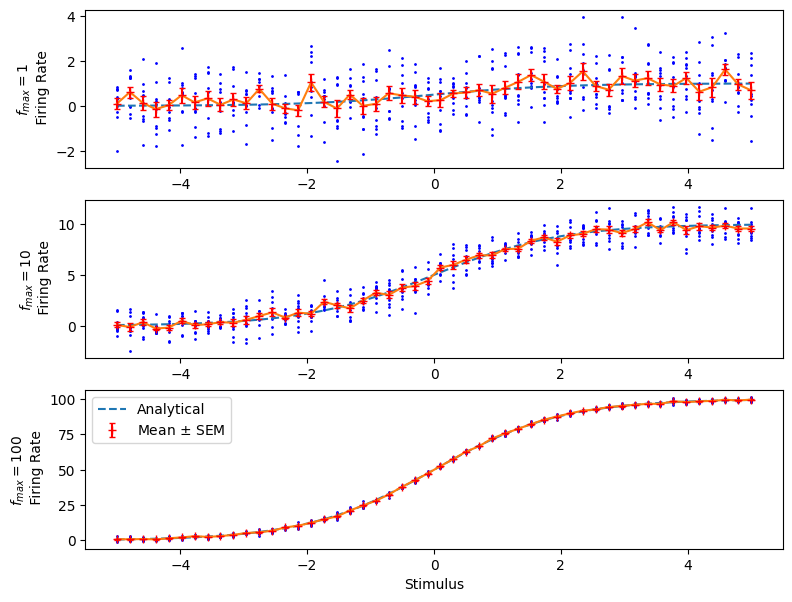

In [35]:
s=np.linspace(-5,5,50)
fmax_list=[1,10,100]

std1=1
fs_without_coeff=tuning_curve(s)
samples=np.zeros((len(fmax_list),len(s),10))
means=np.zeros((len(fmax_list),len(s),1))
fig,axs=plt.subplots(3,1, figsize=(9,7))
sems=np.zeros((len(fmax_list),len(s),1))
for i,fmax in enumerate(fmax_list):
    fs_curve=fmax* fs_without_coeff
    
    for j,fs in enumerate(fs_curve):
        samples[i,j,:]= np.random.normal(fs,std1,size=10)
        means[i,j,:]= np.mean(samples[i,j,:])
        sems[i,j,:]=np.std(samples[i,j,:])/np.sqrt(10)
        
        
        axs[i].scatter(s[j]*np.ones(10),samples[i,j,:],color='blue',s=1)
        axs[i].set_ylabel(r'$f_{max}=$'+f'{fmax} \n Firing Rate')
        
    axs[i].plot(s,fs_curve, '--' , label= 'Analytical')
    axs[i].errorbar(s, means[i, :, 0], yerr=sems[i, :, 0], fmt='+r', capsize=2, label=r'Mean $\pm$ SEM')

    axs[i].plot(s,means[i])
        
axs[2].set_xlabel("Stimulus")
axs[2].legend()
axs[2].legend(['Samples'], loc='upper left')
axs[2].legend()


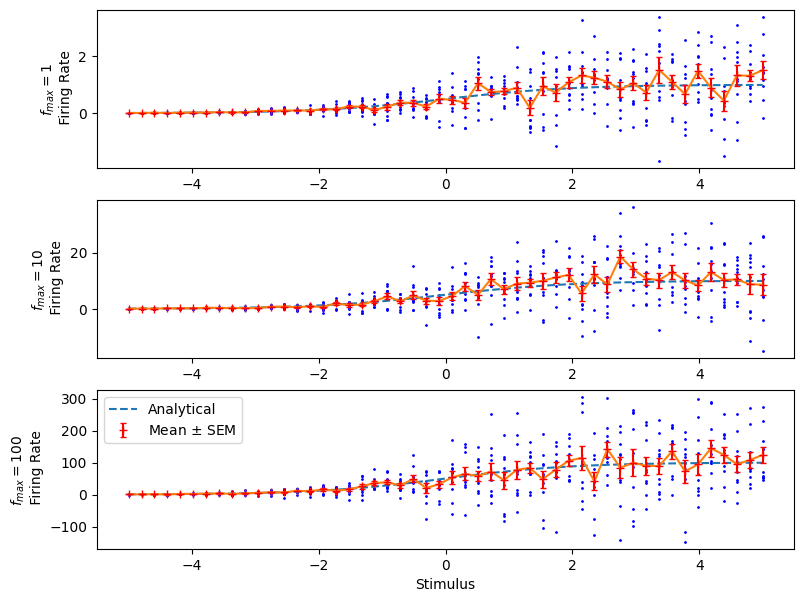

In [36]:

# Normal multiplicative
s=np.linspace(-5,5,50)
fmax_list=[1,10,100]

std1=1
fs_without_coeff=tuning_curve(s)
samples=np.zeros((len(fmax_list),len(s),10))
means=np.zeros((len(fmax_list),len(s),1))
fig,axs=plt.subplots(3,1, figsize=(9,7))
sems=np.zeros((len(fmax_list),len(s),1))
for i,fmax in enumerate(fmax_list):
    fs_curve=fmax* fs_without_coeff
    
    for j,fs in enumerate(fs_curve):
        samples[i,j,:]= np.random.normal(fs,fs,size=10)
        means[i,j,:]= np.mean(samples[i,j,:])
        sems[i,j,:]=np.std(samples[i,j,:])/np.sqrt(10)
        
        
        axs[i].scatter(s[j]*np.ones(10),samples[i,j,:],color='blue',s=1)
        axs[i].set_ylabel(r'$f_{max}=$'+f'{fmax} \n Firing Rate')
        
    axs[i].plot(s,fs_curve, '--' , label= 'Analytical')
    axs[i].errorbar(s, means[i, :, 0], yerr=sems[i, :, 0], fmt='+r', capsize=2, label=r'Mean $\pm$ SEM')

    axs[i].plot(s,means[i])
        
axs[2].set_xlabel("Stimulus")
axs[2].legend()
axs[2].legend(['Samples'], loc='upper left')
axs[2].legend()


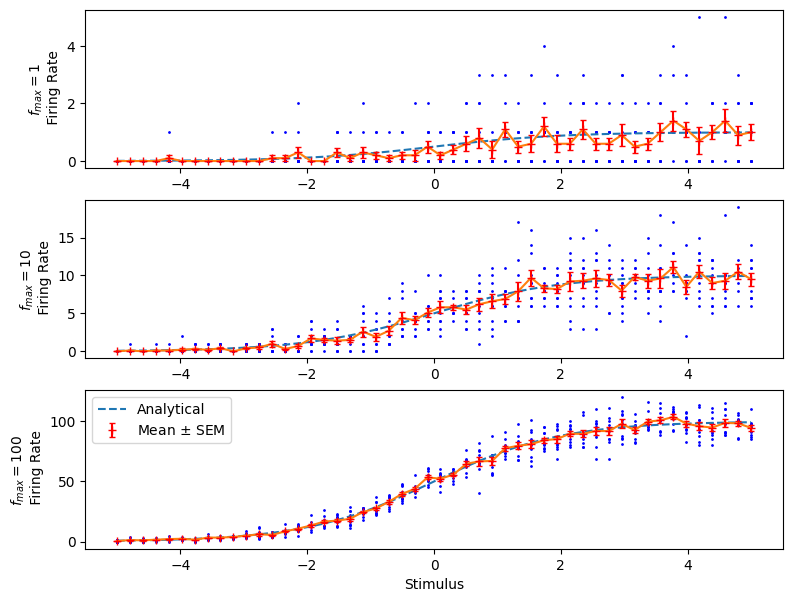

In [37]:
# Poisson
s=np.linspace(-5,5,50)
fmax_list=[1,10,100]

std1=1
fs_without_coeff=tuning_curve(s)
samples=np.zeros((len(fmax_list),len(s),10))
means=np.zeros((len(fmax_list),len(s),1))
fig,axs=plt.subplots(3,1, figsize=(9,7))
sems=np.zeros((len(fmax_list),len(s),1))
for i,fmax in enumerate(fmax_list):
    fs_curve=fmax* fs_without_coeff
    
    for j,fs in enumerate(fs_curve):
        samples[i,j,:]= stat.poisson.rvs(fs,size=10)
        means[i,j,:]= np.mean(samples[i,j,:])
        sems[i,j,:]=np.std(samples[i,j,:])/np.sqrt(10)
        
        
        axs[i].scatter(s[j]*np.ones(10),samples[i,j,:],color='blue',s=1)
        axs[i].set_ylabel(r'$f_{max}=$'+f'{fmax} \n Firing Rate')
        
    axs[i].plot(s,fs_curve, '--' , label= 'Analytical')
    axs[i].errorbar(s, means[i, :, 0], yerr=sems[i, :, 0], fmt='+r', capsize=2, label=r'Mean $\pm$ SEM')

    axs[i].plot(s,means[i])
        
axs[2].set_xlabel("Stimulus")
axs[2].legend()
axs[2].legend(['Samples'], loc='upper left')
axs[2].legend()


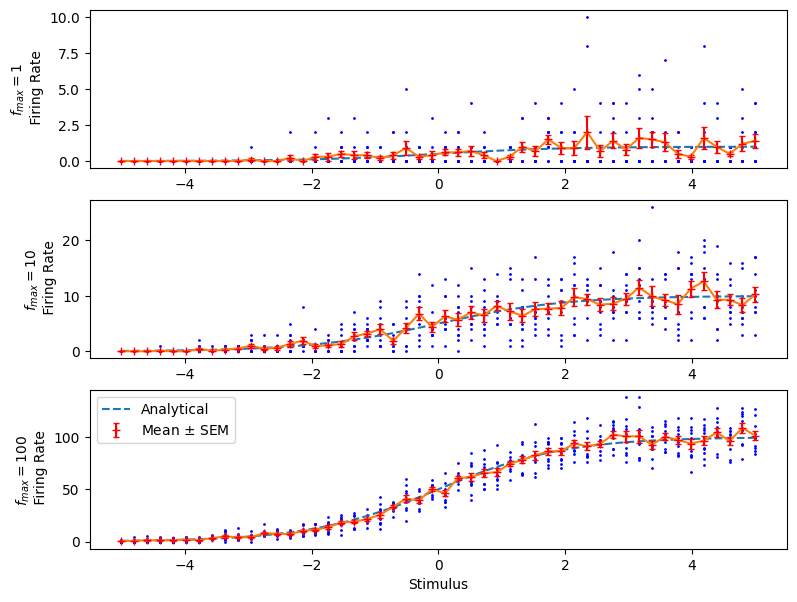

In [38]:

# Negative Binomial

s=np.linspace(-5,5,50)
fmax_list=[1,10,100]

std1=1
fs_without_coeff=tuning_curve(s)
samples=np.zeros((len(fmax_list),len(s),10))
means=np.zeros((len(fmax_list),len(s),1))
fig,axs=plt.subplots(3,1, figsize=(9,7))
sems=np.zeros((len(fmax_list),len(s),1))
for i,fmax in enumerate(fmax_list):
    fs_curve=fmax* fs_without_coeff
    
    for j,fs in enumerate(fs_curve):
        q=fs
        p=fs/(fs+fs)
        samples[i,j,:]= stat.nbinom.rvs(fs,p,size=10)
        means[i,j,:]= np.mean(samples[i,j,:])
        sems[i,j,:]=np.std(samples[i,j,:])/np.sqrt(10)
        
        
        axs[i].scatter(s[j]*np.ones(10),samples[i,j,:],color='blue',s=1)
        axs[i].set_ylabel(r'$f_{max}=$'+f'{fmax} \n Firing Rate')
        
    axs[i].plot(s,fs_curve, '--' , label= 'Analytical')
    axs[i].errorbar(s, means[i, :, 0], yerr=sems[i, :, 0], fmt='+r', capsize=2, label=r'Mean $\pm$ SEM')

    axs[i].plot(s,means[i])
        
axs[2].set_xlabel("Stimulus")
axs[2].legend()
axs[2].legend(['Samples'], loc='upper left')
axs[2].legend()


**Answer e)**

TODO


**3. Bernoulli Neuron: Fisher information and estimator**

Assume a Bernoulli neuron with arbitrary tuning curve $f(s)$, i.e.
$$p(r| f(s)) = f(s)^r(1- f(s))^{1-r}, \qquad r \in \{0; 1\}$$

*Note: $r$ is discrete and $s$ is continuous.*

**(a)** Compute the Fisher information $J_s$. *(2 points)*

**(b)** Assume $f(s) = \frac{1}{1+s^2}$. Plot the Fisher information on the interval $s\in[-5, 5]$. *(2 points)*

**(c)** Given an estimator
$\hat s(r) = \begin{cases} 1 & if\qquad r=0\\ 0 &if\qquad r=1\end{cases}$.\
Compute variance $\sigma^2(s)$, bias $b(s)$, and mean squared error $MS(s)$ of this estimator. Don't use the relationship $MS(s) = b^2(s) + \sigma^2(s)$, but instead compute them independently. *(2 points)*

*Confirm for yourself with an automatized tool like wolphramalpha that their relationship is correct.*

**(d)** Assume $s\sim\mathcal{U}([0,1])$. Compute the ideal observer $\hat s_{MS}(r)$. *(2 points)*

*Hint: Compute $p(r=0)$ and $p(r=1)$ with law of total probability. Then use Bayes' theorem to compute $p(s|r)$. Useful integrals:*
\begin{split}
\int \frac1{1+s^2} ds &= \tan^{-1}(s) + c, \qquad c\in\mathbb{R}\\
\int \frac{s}{1+s^2} ds &= \frac12 \ln(1+s^2) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^2}{1+s^2} ds &= s - \tan^{-1}(s) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^3}{1+s^2} ds &= \frac{s^2 - \ln(1+s^2)}{2} + c, \qquad c\in\mathbb{R}
\end{split}

**(e*)** Contextualize the previous exercises with Cramer-Rao bound. *(up to 3 bonus points depending on the depth of the answer: 1 - rough context, 2 - correct context, 3 - going above and beyond)*


**(a) Answer**

\begin{split}
J_s &= -E_r[\frac{\partial^2}{\partial s^2}\log(p(r|f(s))] \\
&= -E_r[\frac{\partial^2}{\partial s^2}\log(f(s)^r(1-f(s))^{1-r})] \\
&= -E_r[\frac{\partial^2}{\partial s^2}\{r\log(f(s))+(1-r)\log(1-f(s)\}] \\
&= -E_r[\frac{\partial}{\partial s}\{r\frac{f'(s)}{f(s)}+(1-r)\frac{-f'(s)}{1-f(s)}\}] \\
&= -E_r[r\frac{f(s)f''(s)-f'(s)^2}{f(s)^2}+(1-r)\frac{-(1-f(s))f''(s)-f'(s)^2}{(1-f(s))^2}] \\
&= \frac{-f(s)f''(s)+f'(s)^2}{f(s)}+\frac{(1-f(s))f''(s)+f'(s)^2}{(1-f(s))} \\
&= \frac{f'(s)^2}{f(s)}+\frac{f'(s)^2}{1-f(s)} \\
&= \frac{f'(s)^2}{f(s)(1-f(s))} \\
\end{split}


**(b) Answer**

TODO

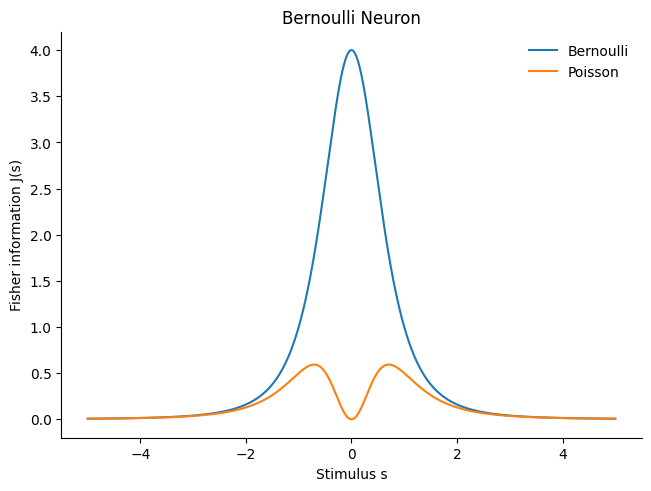

In [ ]:
def f(s):
    return # TODO

def df(s):
    return # TODO

# TODO

**(c) Answer**

Bias of the estimator
\begin{equation*}
\begin{split}
b(s) &= E\left[\hat{s} | s\right] - s \\
&= p(r=0)\cdot \hat{s}(r=0) + p(r=1)\cdot \hat{s}(r=1) - s \\
&= ...
\end{split}
\end{equation*}

Variance of the estimator
\begin{equation*}
\begin{split}
\sigma^2(s) &= E\left[(E[\hat{s}|s] - \hat{s}(r))^2\right] \\
&= ...
\end{split}
\end{equation*}

Mean squared error
\begin{equation*}
\begin{split}
MS(s) &= E\left[(s-\hat{s}(r))^2\right] \\
&= ...
\end{split}
\end{equation*}

**(d) Answer**

\begin{split}
p(r=1) &= \int_0^1 p(r=1|s) \cdot p(s) ds\\
&= ...\\
p(r=0) &= ...
\end{split}

Ideal observer
\begin{split}
\hat{s}_{MS}(r) &= ... \\
\hat{s}_{MS}(r=1) &= ...\\
&\approx 0.44 \\
\hat{s}_{MS}(r=0) &= ...\\
&\approx 0.71
\end{split}

In [ ]:
# Simulation for checking my numbers in (d)(not required)
n_samples = 100_000
s = np.random.random(size=(n_samples))
r = np.random.binomial(n=1, p=f(s))
print("p(r=1)", np.mean(r==1))
print("p(r=0)", np.mean(r==0))

print("<s|r=1>", np.mean(s[r==1]))
print("<s|r=0>", np.mean(s[r==0]))

p(r=1) 0.78566
p(r=0) 0.21434
<s|r=1> 0.44178663811078944
<s|r=0> 0.7153706881452142


**(e) Answer**
TODO